In [22]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#LGBM Model
import lightgbm as lgb

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
df_recommended= pd.read_excel('Cropping_System_final_Model.xlsx')

In [24]:
df_recommended.head()

,SQI,Label,SeasonKharif,SeasonRabi
0,0.77,Rice,1,0
1,0.84,Rice,1,0
2,0.85,Rice,1,0
3,0.80,Rice,1,0
4,0.81,Rice,1,0


In [25]:
X= df_recommended.drop('Label', axis=1)
y= df_recommended['Label']

In [26]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, shuffle=True, random_state=0)

In [27]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred= classifier.predict(X_test)

In [29]:
print("Decision tree model accuracy score:{0:0.4f}".format(accuracy_score(y_test, y_pred)))

Decision tree model accuracy score:0.9385


In [30]:
confusion_matrix(y_test,y_pred)

array([[ 3,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 0,  0,  1,  1,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 55]], dtype=int64)

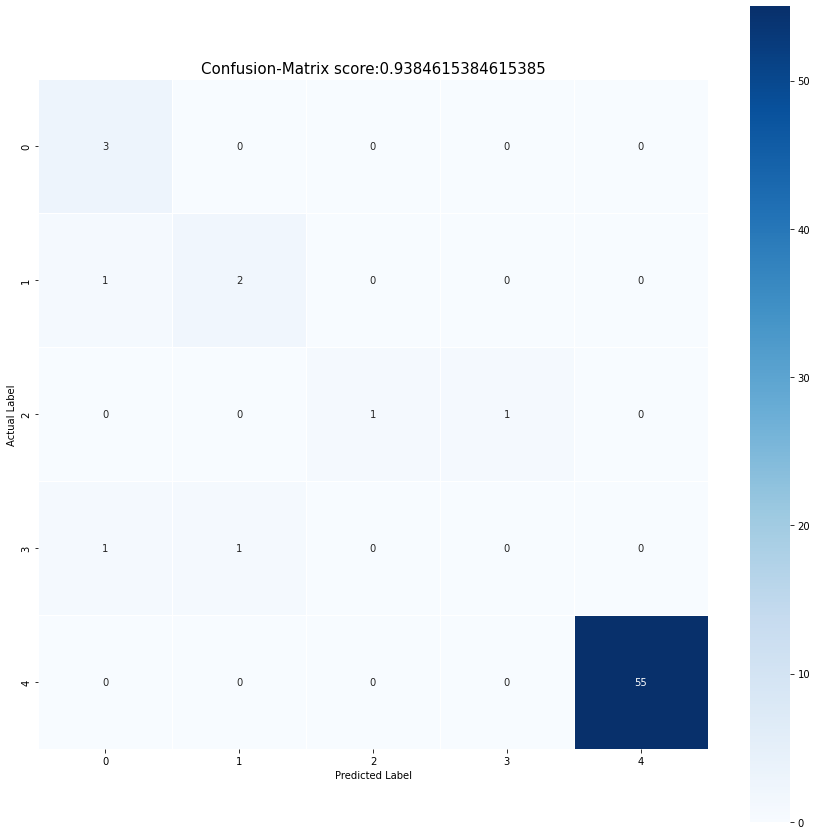

In [31]:
decisiontree_cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(decisiontree_cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title="Confusion-Matrix score:" + str(accuracy_score(y_pred,y_test))
plt.title(all_sample_title, size=15)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Blackgram       0.60      1.00      0.75         3
         Potato       0.67      0.67      0.67         3
Rabi_vegetables       1.00      0.50      0.67         2
        Rapseed       0.00      0.00      0.00         2
           Rice       1.00      1.00      1.00        55

       accuracy                           0.94        65
      macro avg       0.65      0.63      0.62        65
   weighted avg       0.94      0.94      0.93        65

